# Guía 6 Problema 10

*Por Gabriel Goren. L.U.:199/15. FCEN - UBA*

*Email: gabrielgoren@gmail.com*

### Enunciado

Estudie el grado de validez del teorema central del lı́mite dibujando las distribuciones siguientes, y superponiendo sobre ellas la gaussiana con el $\mu$ y $\sigma$ correspondiente.

**(a)** $B_k(5,0.2)$, $B_k (30,0.4)$

**(b)** $P_n(4)$, $P_n(10)$, $P_n(40)$


### Metodología de resolución

En primer lugar realizo todos los gŕaficos que pide el nunciado con un único bloque de código. Luego describo las similitudes y diferencias entre las distribuciones que se observan cualitativamente. Finalmente explico por qué tiene sentido la aplicación del Teorema Central del Límite a estos casos desde un punto de vista analítico.

---------------------

Para graficar las gaussianas, determinamos qué parámetros deben tener, i.e. cuáles son la esperanza y dispersión estándar de las distribuciones discretas.

*(a) Comparación de binomial con gaussiana*

En el primer caso a comparar, $n = 5$ y $p = 0.2 \implies \mu = np = 1$; $\sigma = \sqrt{np(p-1)} = \sqrt{0.8} \simeq 0.894$

En el segundo caso, $n = 30$ y $p = 0.4 \implies \mu = 12$, $\sigma = \frac{6\sqrt{5}}{5} \simeq 2.683$

*(b) Comparación de poisson con gaussiana*

En el primer caso a comparar, $\mu =  4 \implies \sigma = \sqrt{\mu} = 2$

En el segundo caso, $\mu =  10 \implies \sigma = \sqrt{10} \simeq 3.16$

En el tercero, $\mu =  40 \implies \sigma = \sqrt{40} = 6.32$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson

params = {'legend.fontsize': 20,
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

axes = {}
fig1, (axes[0], axes[1]) = plt.subplots(1,2, figsize=(20,8))
fig2 = plt.figure(figsize=(20,16))
axes[2], axes[3], axes[4] = fig2.add_subplot(221), fig2.add_subplot(222), fig2.add_subplot(223)

# Rangos de abscisas
xs = np.array([[range(6),  np.linspace(-1,6,1000)],
               [range(31), np.linspace(-5, 35, 10000)],
               [range(21), np.linspace(-4, 20, 1000)],
               [range(31), np.linspace(-5, 30, 10000)],
               [np.arange(10,71), np.linspace(10, 70, 10000)]])
# Gráficos de las distribuciones discretas
pmfs = [binom.pmf(xs[0,0], 5, 0.2), binom.pmf(xs[1,0], 30, 0.4),
        poisson.pmf(xs[2,0], 4), poisson.pmf(xs[3,0], 10), poisson.pmf(xs[4,0], 40)]
# Gráficos de las gaussianas
pdfs = [norm.pdf(xs[0,1], 1, 0.894), norm.pdf(xs[1,1], 12, 2.683),
        norm.pdf(xs[2,1], 4, 2), norm.pdf(xs[3,1], 10, 3.16), norm.pdf(xs[4,1], 40, 6.32)]
labels = np.array([['Binom(5, 0.2)', 'N(1, 0.894)'],
                   ['Binom(30, 0.4)', 'N(12, 2.863)'],
                   ['Poisson(4)', 'N(4,2)'],
                   ['Poisson(10)', 'N(10,3.16)'],
                   ['Poisson(40)', 'N(40,6.32)']])
titles = ['Binom(5, 0.2) vs. N(1, 0.894)',
          'Binom(30, 0.4) vs. N(12, 2.863)',
          'Poisson(4) vs. N(4,2)',
          'Poisson(10) vs N(10,3.16)',
          'Poisson(40) vs N(40,6.32)']

for i in range(5):
    axes[i].plot(xs[i,0], pmfs[i], 'o', color='deeppink', label=labels[i,0]);
    axes[i].plot(xs[i,1], pdfs[i], '-', color='dodgerblue', label=labels[i,1]);
    axes[i].set_xlabel('x'), axes[i].set_ylabel('y');
    axes[i].set_title(titles[i]), axes[i].legend();

# (a) Comparación de binomial con gaussiana


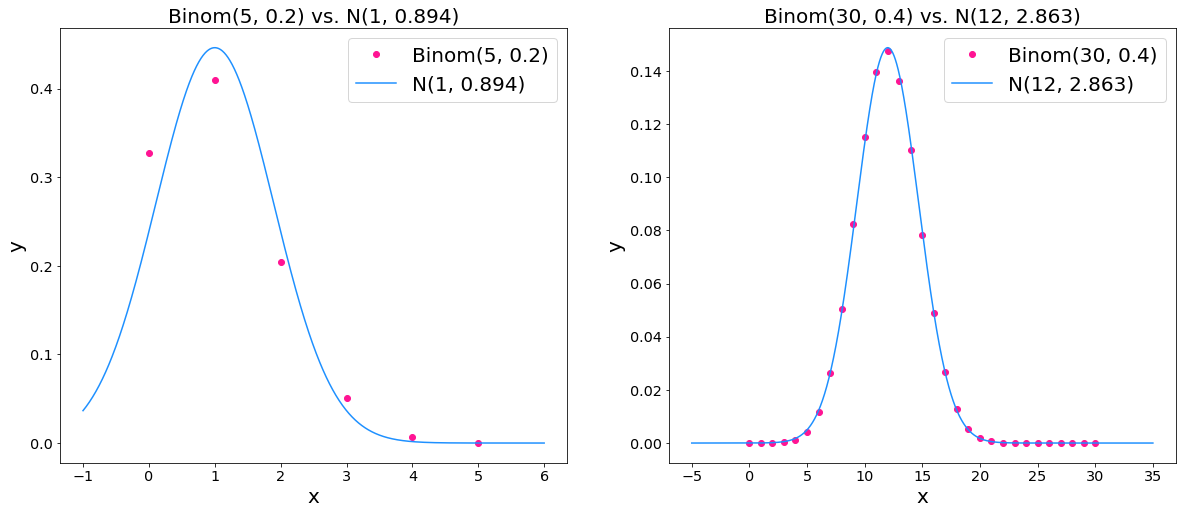

In [2]:
fig1

Para la distribución Binom(5, 0.2) se ve que la aproximación por una normal no es buena, en particular porque no es simétrica y su esperanza está muy cerca del valor mínimo que puede adoptar. Esto implica que la distribución normal de igual esperanza y varianza asigna una densidad de probabilidad significativa a valores negativos, que no tienen sentido para ningún sistema o proceso que se pretenda modelar con una binomial. Aún así, hay una cierta similitud entre las distribuciones y sus modas son coincidentes. Esto es así porque la moda y esperanza de la normal coinciden, y porque
tal como vimos en clase la moda de la binomial está dada por

$$ k_{max} = \begin{cases} \lfloor (n+1)p \rfloor &\mbox{si } (n+1) \notin \mathbb{N} \\
                           \{(n+1)p, \; (n+1)p-1\} &\mbox{si } (n+1) \in \mathbb{N} \end{cases}$$

y $(5+1) \times 0.2 = 1.2 \notin \mathbb{N} \implies k_{max} = 1 = np$. Si este no fuera el caso la binomial tendría dos valores más probables: uno de las cuales coincide con el de la normal y otro más chico. Esto aumentaría la diferencia cualitativa entre ambas distribuciones.

Para Binom(30, 0.4), en cambio, no aparece el problema de los negativos dado que la densidad de probabilidad que les asigna la normal correspondiente es muy baja, porque la esperanza de ambas es lo suficientemente grande. Además la binomial ya es casi completamente simétrica. Nuevamente coinciden las modas dado que $(30+1) \times 0.4 = 12.4 \notin \mathbb{N} \implies k_{max} = 12 = np$.

Notar que una leve diferencia en los parámetros de la binomial siempre puede hacer que haya dos valores más probables en vez de uno, sin importar que tan grande sea $np$, pero a medida que aumenta $n$ también aumenta la varianza $np(1-p)$ con lo cual la distribución es más ancha y esta discrepancia entre las distribuciones en cuanto a la forma exacta del pico se hace menos importante.

# (b) Comparación de poisson con gaussiana

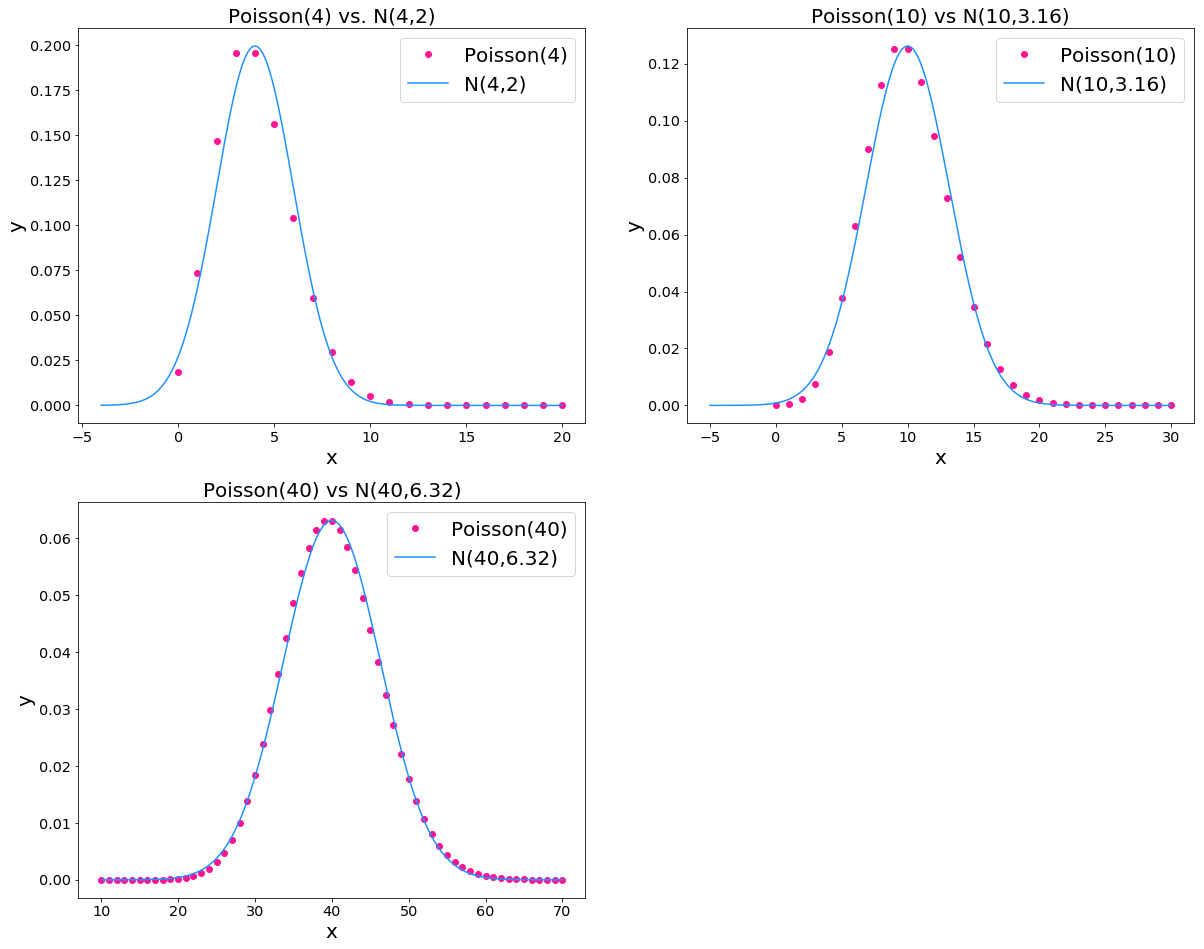

In [3]:
fig2

Nuevamente para la poissoniana con esperanza baja ($\mu=4$) se tiene el mismo problema con la densidad de la normal en los valores negativos. Sin embargo Poisson toma argumentos de $0$ a $\infty$ y para esperanzas bajas asigna probabilidad significativa a valores más altos que una binomial con la misma esperanza pero $n$ chico, como es el caso de Binom(5, 0.2) (es decir, tiene una dispersión mayor). Esto implica que hay un mayor rango de abscisas para Poisson(4) que para Binom(5, 0.2) en el cual la normal resulta una aproximación razonable.

Respecto de las modas, puede verse que las tres poissonianas presentan dos valores más probables, y en eso difieren de sus respectivas normales siendo más asimétricas que ellas, incluso para las esperanzas más grandes. Según se demuestra en [esta respuesta de StackExchange](https://math.stackexchange.com/questions/246496/the-mode-of-the-poisson-distribution), para Poisson

$$ k_{max} = \begin{cases} \lfloor \mu \rfloor &\mbox{si } \mu \notin \mathbb{N} \\
                           \{\mu, \; \mu-1\} &\mbox{si } \mu \in \mathbb{N} \end{cases}$$

por lo cual alcanza con tomar $\mu \notin \mathbb{N}$, a diferencia de las esperanzas de las poissonianas graficadas, para que deje de haber dos valores más probables.

Sobre la distribución Poisson(10), se observa que se pega menos a los flancos de su normal corresponidente que lo que ocurre con Binom(30, 0.4), una distribución cuya esperanza es muy similar ($np = 12$). Esto pone de relieve la diferencia que puede haber entre Binomial y Poisson con igual esperanza en la medida en la que no se cumpla el límite aproximado $n \to \infty, p \to 0$.

Por último, para $\mu = 40$ ya se observa una similitud muy grande entre Poisson y la normal con igual esperanza y varianza, aunque se nota la asimetría en los flancos de la campana debida a la presencia de dos valores más probables en vez de uno.

## Aplicabilidad del TCL a Binomial y Poisson

El Teorema Central del Límite en general se enuncia para sumas de variables aleatorias independientes. Sin embargo vemos que también ocurre que una única variable binomial o poissoniana tiende a ser normal para valores altos de $n$ y $mu$ respectivamente.

Para el caso de las variables binomiales, esto se debe a que si $X \sim Binom(n, p)$ entonces $X = \sum^n_i X_i$ con $X_i \sim Bernoulli(p) \forall i$ donde definimos la distribución de Bernoulli según

\begin{align}
\mathrm{Pr}(X_i=0) &=1-p \\
\mathrm{Pr}(X_i=1)  &=p
\end{align}

i.e. una variable binomial es una suma de variables aleatorias que son $0$ con probabilidad $1-p$ y $1$ con probabilidad $p$ (experimentos de Bernoulli). Esto se ve de la construcción misma de la distribución binomial. Por lo tanto $n$ grande implica que la variable puede expresarse como una suma de una gran cantidad de variables aleatorias para las cuales se aplica el TCL $\implies$ una variable binomial tiende a ser normal cuando $n \to \infty$.

Para el caso poissoniano, la explicación es análoga pero con dos diferencias importantes:

- Las variables aleatorias en cuya suma puede descomponerse una variable poissoniana también son poissonianas
- El número de estas variables aleatorias puede elegirse tan grande o tan chico como se quiera.

Estas dos propiedades se resumen diciendo que distribución de Poisson es [infinitamente divisible][1]. La demostración de esto puede verse fácilmente a partir de la función característica de Poisson:

$$ \phi(t) = \exp (\mu (e^{it}-1))$$

Como la suma de variables aleatorias tiene una función característica que es el producto de las características de los sumandos, se observa que para una suma de $n$ variables poissonianas con parámetro $\lambda$ la función característica será $\phi_n(t) = \exp (n\lambda (e^{it}-1)) \implies$ la suma tendrá distribución Poisson($n\lambda$). Como $\lambda$ es continuo, puede asumir cualquier valor real $\implies$ si quiero $\mu = n\lambda$, $n$ puede ser cualquier natural.
[1]: https://es.wikipedia.org/wiki/Divisibilidad_infinita_(probabilidad)

Por último, en este ejercicio vemos que para valores de $n$ a partir de aproximadamente 50, la aproximación por una gaussiana de distribuciones binomiales y poissonianas ya es bastante aceptable. Las probabilidades puntuales de las distribuciones discretas pueden ser evaluadas aproximadamente evaluando la densidad de probabilidad continua en los números naturales, y las sumatorias sobre la variable discreta pueden ser aproximadas por las integrales de la densidad continua sobre el rango correspondiente. Obviamente la validez de la aproximación depende del uso que se le vaya a dar, pero es importante notar que la aproximación ya es aceptable para valores de $n$ que a priori podrían parecer demasiado bajos.